In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.make_interval_blobs(n_samples=30, n_clusters=4, n_dims = 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0        -12.189947        -9.909192        -2.661876        -1.908593   
1         -3.851428        -2.528035         1.563908         3.340099   
2          0.225905         0.634564        -3.636602        -1.249280   
3        -11.809052        -8.586509        -3.568506        -0.495697   
4         -5.637674        -2.331038         0.779701         1.078920   
5          0.662031         0.762031        -2.802785        -1.395187   
6         -5.783782        -5.335943        -0.162633         1.484571   
7         -5.299152        -3.771748         0.889533         3.278065   
8         -1.506341        -1.406341        -3.737760        -3.637760   
9         -9.577768        -8.857929        -3.032664        -2.375360   
10        -1.631966        -1.531966        -3.923940        -2.716

In [2]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  
print(random_data.get_intervals().shape[0])

<class 'interClusLib.IntervalData.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 6)
30


30
[[1.         0.         0.10517824 0.42384321 0.         0.17838493
  0.         0.         0.         0.24240189 0.08617627 0.0967229
  0.         0.43758459 0.00857513 0.00146306 0.1201567  0.01148371
  0.18597791 0.11765072 0.         0.         0.01424045 0.34282462
  0.         0.08844922 0.04425074 0.         0.         0.039155  ]
 [0.         1.         0.         0.         0.21907492 0.
  0.30097002 0.38215141 0.         0.         0.         0.
  0.24031041 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.07877701 0.         0.         0.         0.41796119 0.        ]
 [0.10517824 0.         1.         0.24613143 0.         0.28007013
  0.         0.         0.0976785  0.09177708 0.19651491 0.07450646
  0.         0.08728385 0.3579344  0.05235996 0.1773952  0.14252272
  0.00427696 0.10069848 0.1705948  0.15221539 0.18605735 0.10951768
  0.         0.06210891 0.16717619 0.21315384 0.         0.13714201]
 [0.423

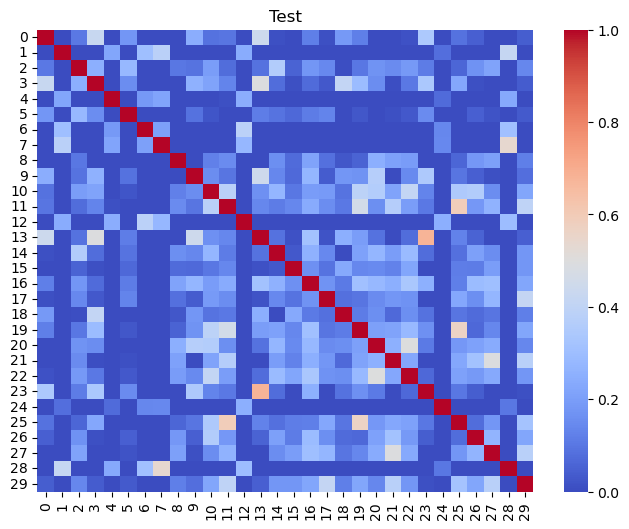

In [3]:
print(random_data.get_intervals().shape[0])

from interClusLib.metric import *
distance_matrix = pairwise_similarity(random_data.get_intervals(),"jaccard")

print(distance_matrix)

plt.figure(figsize=(8, 6))
HeatMap.draw_heat_map(distance_matrix, ax = None ,cmap = 'coolwarm', annot=False, cbar=True)
plt.title("Test")
plt.show()

In [4]:
model = IntervalKMeans(n_clusters=4,max_iter=100,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())
print(model.labels_)

hmodel = IntervalAgglomerativeClustering(n_clusters=4, linkage='ward')
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

dendrogram_data = hmodel.get_dendrogram_data()

print(dendrogram_data)

# 绘制基本树形图

[2 3 1 2 3 1 3 3 0 2 0 0 3 2 0 1 0 0 2 0 2 0 1 2 3 0 0 0 3 0]
[1 0 3 1 0 3 0 0 3 1 2 2 0 1 3 3 3 3 1 2 1 3 3 1 0 2 3 3 0 3]
{'linkage_matrix': array([[16.        , 26.        ,  1.17178863,  2.        ],
       [21.        , 27.        ,  1.33132964,  2.        ],
       [14.        , 30.        ,  1.40101493,  3.        ],
       [29.        , 31.        ,  1.59115316,  3.        ],
       [ 7.        , 28.        ,  1.64057926,  2.        ],
       [19.        , 25.        ,  1.64625188,  2.        ],
       [ 6.        , 12.        ,  1.67325473,  2.        ],
       [10.        , 11.        ,  1.67622582,  2.        ],
       [13.        , 23.        ,  1.6916087 ,  2.        ],
       [ 2.        ,  5.        ,  1.85512921,  2.        ],
       [15.        , 22.        ,  1.92781888,  2.        ],
       [ 8.        , 32.        ,  1.98793433,  4.        ],
       [ 9.        , 20.        ,  2.14172176,  2.        ],
       [ 0.        ,  3.        ,  2.41265505,  2.        ],
   

Requested clusters: 5, Actual clusters: 5


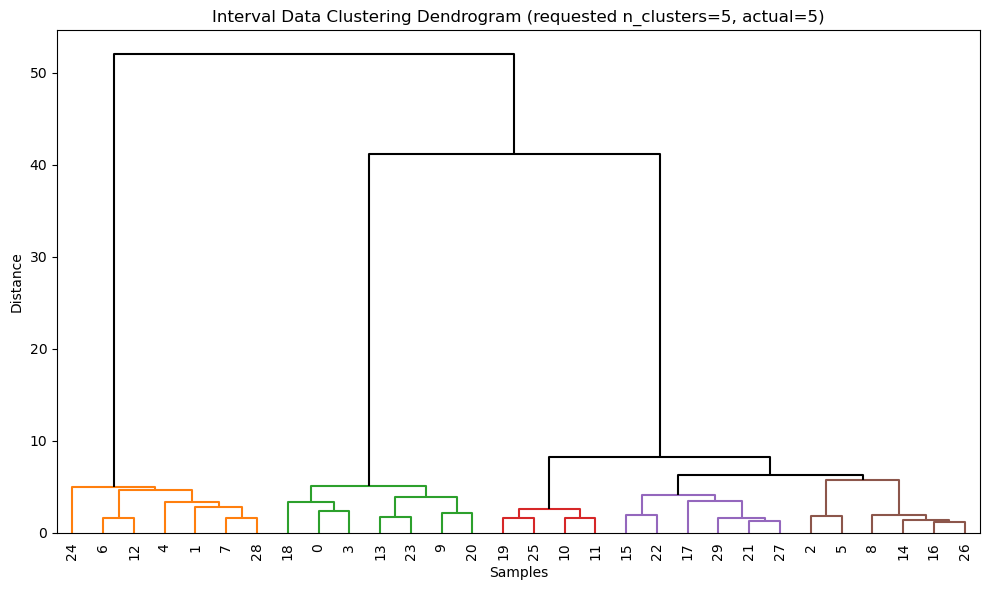

In [10]:
fig, ax, dendro_output = Dendrogram.visualize(
    dendrogram_data=dendrogram_data,
    title="Interval Data Clustering Dendrogram",
    n_clusters = 5
)

(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Parallel Coordinates'}>)

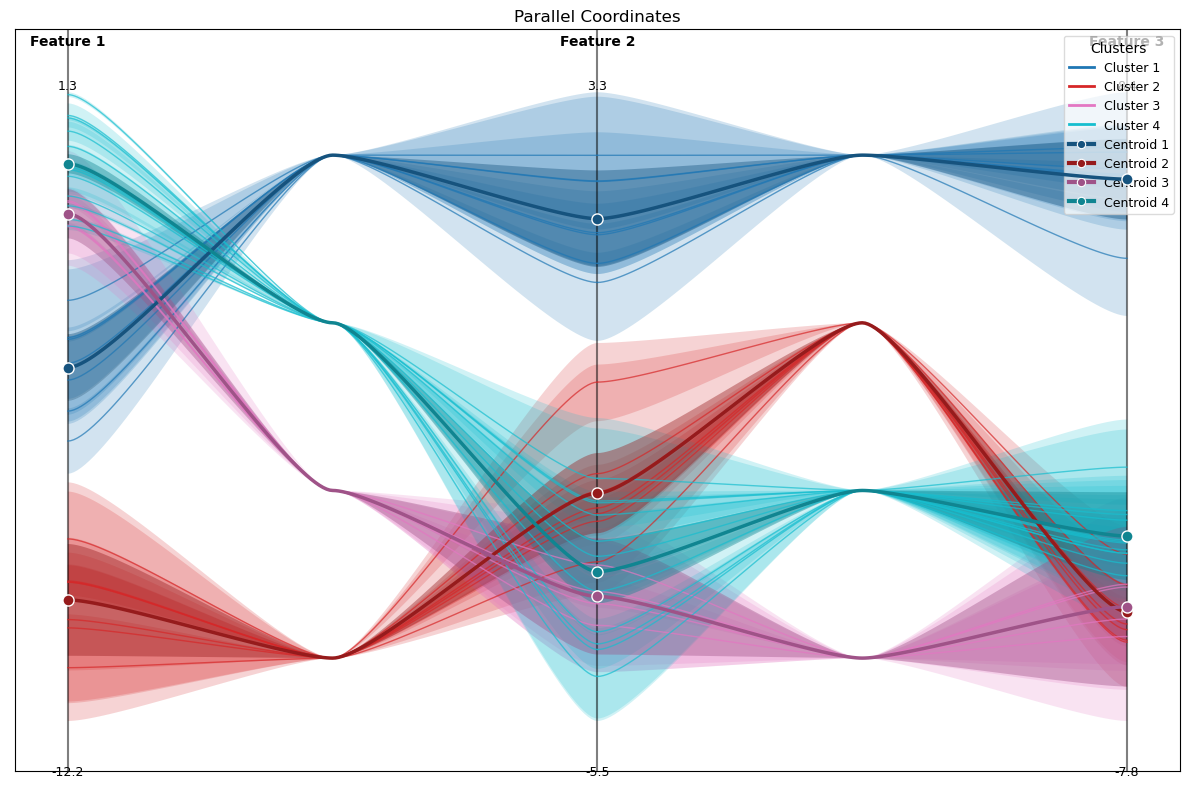

In [6]:

IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), feature_names= None, centroids= hmodel.centroids_,labels=hmodel.labels_, beta = 1)


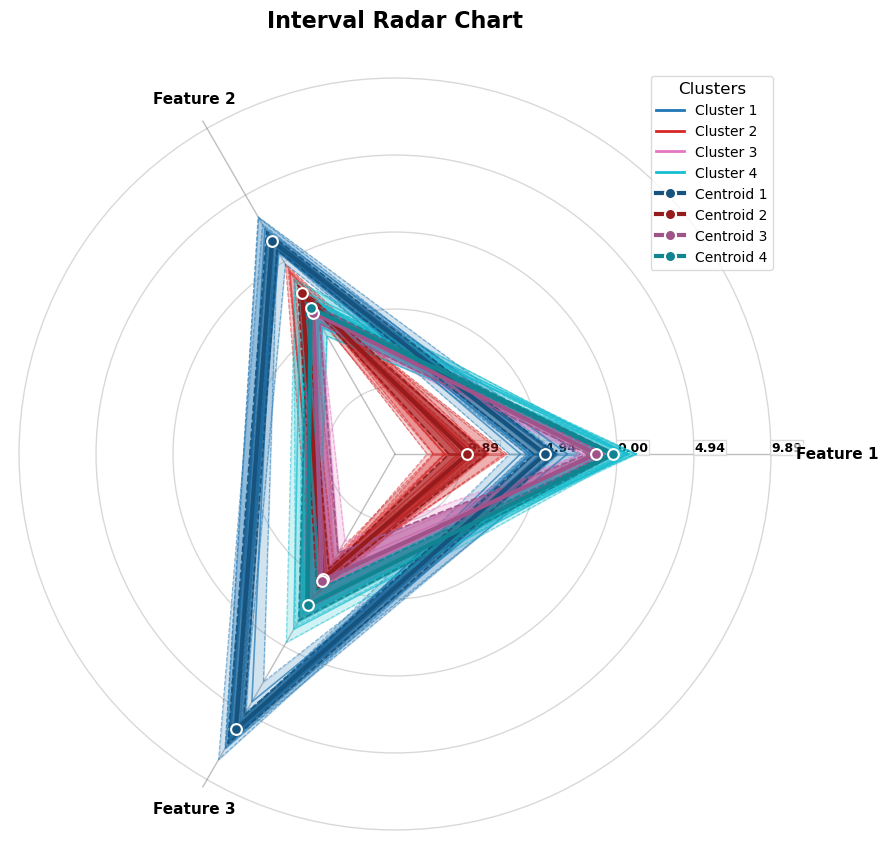

In [7]:
fig, ax = IntervalRadarChart.visualize(
    intervals=random_data.get_intervals(), 
    centroids=hmodel.centroids_,
    labels=hmodel.labels_, 
    title="Interval Radar Chart"
)

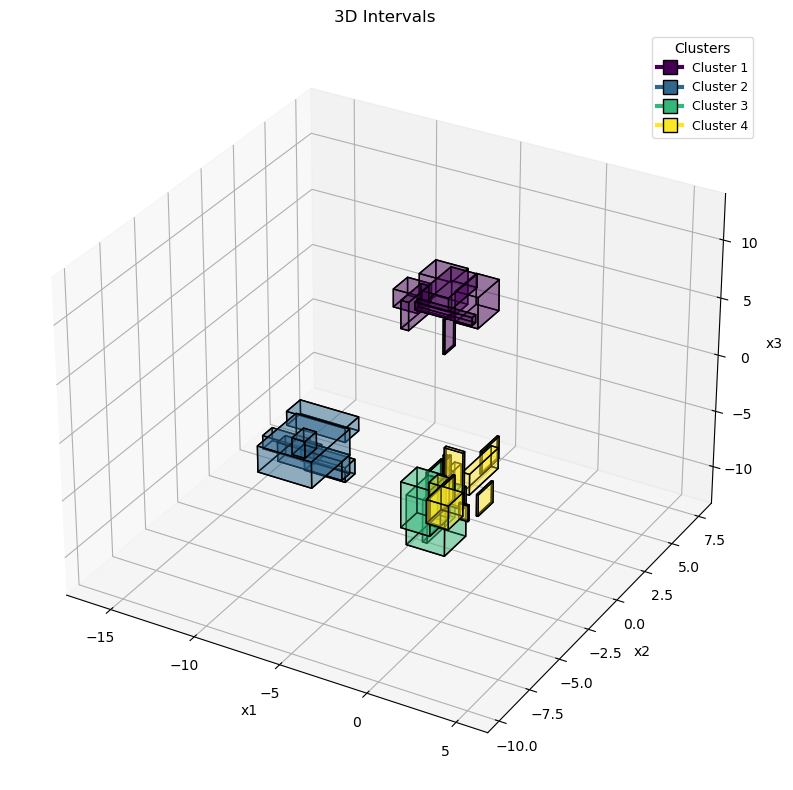

In [8]:
fig, ax = Interval3d.visualize(intervals = random_data.get_intervals(), centroids= None, labels = hmodel.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0        -12.189947        -9.909192        -2.661876        -1.908593   
1         -3.851428        -2.528035         1.563908         3.340099   
2          0.225905         0.634564        -3.636602        -1.249280   
3        -11.809052        -8.586509        -3.568506        -0.495697   
4         -5.637674        -2.331038         0.779701         1.078920   
5          0.662031         0.762031        -2.802785        -1.395187   
6         -5.783782        -5.335943        -0.162633         1.484571   
7         -5.299152        -3.771748         0.889533         3.278065   
8         -1.506341        -1.406341        -3.737760        -3.637760   
9         -9.577768        -8.857929        -3.032664        -2.375360   
10        -1.631966        -1.531966        -3.923940        -2.716561   
11        -2.447502        -0.780448        -4.827203        -3.513170   
12        -6.8

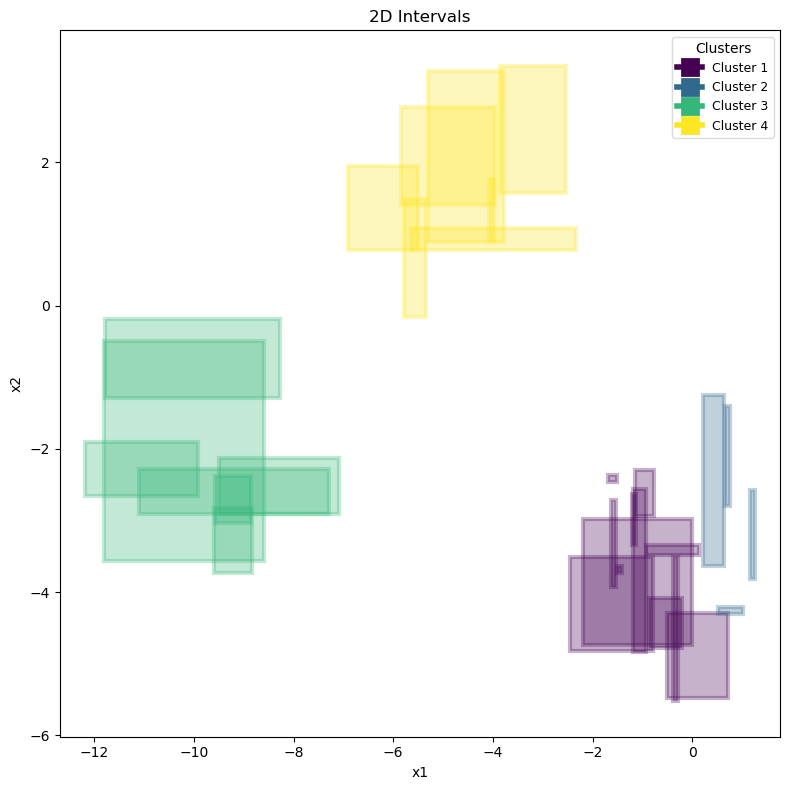

In [9]:

print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

fig, ax = Interval2d.visualize(intervals = random_data.get_intervals(), centroids= None, labels = model.labels_, fill_intervals=True)